前準備

In [1]:
#numpy, matplotlib, pandasのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#日付データの変更のためインポート
import datetime as dt

#lightGBMのインポート
import lightgbm as lgb

#訓練データとテストデータ分割のためにインポート
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#標準化のためインポート
from sklearn.preprocessing import StandardScaler

#エンコーディングのためインポート
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#精度検証のためインポート
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#ハイパーパラメータチューニングのためにインポート
from sklearn.model_selection import GridSearchCV

#特徴量選択のためにインポート
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

#ロジスティック回帰のためにインポート
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#SVMのためにインポート
from sklearn import svm

#決定木のためにインポート
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#ランダムフォレストのためにインポート
from sklearn.ensemble import RandomForestClassifier

#アダブーストのためにインポート
from sklearn.ensemble import AdaBoostClassifier

#CatBoostのためにインポート
from catboost import CatBoostClassifier
from catboost import Pool

#SMOTEのためにインポート
from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# notebookの設定

# データフレームの最大表示行数、列数を広げる
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# 図のサイズ
plt.rcParams["figure.figsize"]=(8,4)

# matplotlibのフォント
font = 'Yu Mincho'

In [4]:
#学習データ、テストデータの読み込み
train0 = pd.read_csv('train_202304.csv')
test0 = pd.read_csv('test_202304.csv')

In [5]:
train0

,ID,申込年月日,申込時間,大媒体コード,インターネット詳細,受付形態区分,生年月日,性別,独既区分,扶養家族人数,扶養家族子供人数,ＪＩＳ住所コード,住居区分,名義区分,家賃負担額,居住月数,家族構成区分,同居区分,保険職種区分,雇用形態区分,就業形態区分,業種区分,会社規模区分,在社月数,合計年収,申込限度額,事故12フラグ
0,20230300001,2017/1/4,114936,3,0,1,1972/9/19,2,1,1,1.0,45201,5,0,23000,213,4,1,1,2,1,4,2,1,1800000,100000,0
1,20230300002,2017/1/5,103658,11,3,1701,1996/9/1,2,1,0,0.0,27229,4,0,30000,21,5,2,1,4,1,99,7,21,1900000,400000,0
2,20230300003,2017/1/13,190232,3,0,1,1996/11/8,2,1,0,0.0,45203,8,3,0,13,4,1,1,2,1,1,7,32,1500000,50000,0
3,20230300004,2017/1/18,125334,11,1,1801,1993/7/4,2,1,0,0.0,45201,8,3,0,120,4,1,3,4,1,99,7,4,2000000,200000,0
4,20230300009,2017/2/4,142321,11,1,1701,1991/9/12,1,1,0,0.0,46204,8,3,0,299,4,1,3,2,1,1,8,57,2100000,60000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16297,20230327165,2021/11/1,130150,11,1,1801,1954/1/20,2,2,0,0.0,27210,4,0,0,381,1,1,3,4,1,99,7,91,901000,100000,0
16298,20230327166,2021/11/11,95223,11,1,1801,1977/4/18,2,2,0,0.0,29206,9,3,62000,168,1,1,3,4,1,1,6,42,690000,120000,0
16299,20230327167,2021/12/3,130144,99,0,1,1955/9/21,1,1,0,0.0,26210,1,1,0,795,5,2,3,4,1,99,6,23,2500000,400000,0
16300,20230327168,2021/12/6,163926,11,1,1701,1988/5/31,1,1,0,0.0,25201,1,3,0,403,4,1,1,2,2,99,4,19,2250000,30000,0


In [6]:
test0

,ID,申込年月日,申込時間,大媒体コード,インターネット詳細,受付形態区分,生年月日,性別,独既区分,扶養家族人数,扶養家族子供人数,ＪＩＳ住所コード,住居区分,名義区分,家賃負担額,居住月数,家族構成区分,同居区分,保険職種区分,雇用形態区分,就業形態区分,業種区分,会社規模区分,在社月数,合計年収,申込限度額,事故12フラグ
0,20230300005,2017/1/21,192855,3,0,1,1985/4/12,1,2,1,1.0,46224,4,0,0,8,2,1,1,2,2,1,4,8,2400000,200000,0
1,20230300006,2017/1/23,204631,99,0,1,1990/11/2,1,1,0,0.0,46225,4,0,0,45,5,2,1,4,1,1,3,21,1200000,30000,0
2,20230300007,2017/1/24,125548,6,0,1,1996/10/8,1,1,0,0.0,46201,5,0,0,211,4,1,3,4,1,99,6,21,1800000,500000,0
3,20230300008,2017/1/24,155014,6,0,1,1996/7/3,1,1,0,0.0,46201,8,3,0,193,4,1,1,4,1,99,2,6,2160000,500000,0
4,20230300012,2017/2/13,171220,11,1,1701,1995/10/3,1,1,0,0.0,45201,8,3,0,14,5,2,3,2,1,1,7,32,3300000,300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10862,20230327159,2021/9/11,135324,99,0,1,2001/8/15,1,1,0,0.0,26201,3,0,0,15,5,2,1,2,1,99,1,18,3000000,50000,0
10863,20230327160,2021/9/12,11646,11,4,1701,2001/9/9,2,1,0,0.0,26108,4,0,0,5,5,2,1,4,1,99,4,4,2000000,300000,0
10864,20230327161,2021/9/18,182328,99,0,1,1954/3/4,2,2,0,0.0,29442,8,3,0,520,1,1,3,4,1,99,6,216,900000,200000,0
10865,20230327162,2021/9/22,193216,99,0,1,2001/8/26,1,1,0,0.0,26111,8,3,0,241,4,1,3,4,1,5,9,18,3300000,300000,1


In [7]:
# 不要な変数の削除

# 変数名と列番号の対応を表示
col = pd.DataFrame(train0.columns.values).T

# dropの実行,事故率に関係ないデータは予測に利用できないのでdrop(後々他の変数をdropしたくなった時楽な様に列番号でdropする)
train1 = train0.drop(train0.columns[0],axis=1) 
test1 = test0.drop(test0.columns[0],axis=1)

In [8]:
#目的変数を分離する

train_x = train1.drop(['事故12フラグ'], axis=1)
train_y = train1['事故12フラグ']
test_x = test1.drop(['事故12フラグ'], axis=1)
test_y = test1['事故12フラグ']

特徴量に関する処理

In [9]:
#欠損値を埋め合わせる処理　pandasを使用
train_x = train_x.fillna(train_x.mean())
test_x  = test_x.fillna(test_x.mean())

#train_x = train_x.fillna(train_x.median())
#test_x  = test_x.fillna(test_x.median())

In [10]:
# 変数の加工のための関数を作成


# カテゴリ変数をOne-hot化する関数

def dummy(feature):
    ohe = OneHotEncoder(sparse=False, categories='auto')
    ohe.fit(train_x[[feature]])
    
    #ダミー変数の列名の作成
    columns = []
    columns += [str(feature) + f'_{v}' for v in ohe.categories_[0]]
    
    #生成されたダミー変数をデータフレームに変換
    dummy_vals_train = pd.DataFrame(ohe.transform(train_x[[feature]]), columns=columns)
    dummy_vals_test  = pd.DataFrame(ohe.transform(test_x[[feature]]), columns=columns)
    
    #残りの変数と結合
    tr = pd.concat([train_x.drop([feature],axis=1), dummy_vals_train], axis=1)
    te  = pd.concat([test_x.drop([feature],axis=1), dummy_vals_test], axis=1)
    
    return tr, te

def dummy_ex(feature):
    ohe = OneHotEncoder(sparse=False, categories='auto')
    new_array = pd.concat([train_x[[feature]],test_x[[feature]]], axis=0)
    ohe.fit(new_array)
    
    #ダミー変数の列名の作成
    columns = []
    columns += [str(feature) + f'_{v}' for v in ohe.categories_[0]]
    
    #生成されたダミー変数をデータフレームに変換
    dummy_vals_train = pd.DataFrame(ohe.transform(train_x[[feature]]), columns=columns)
    dummy_vals_test  = pd.DataFrame(ohe.transform(test_x[[feature]]), columns=columns)
    
    #残りの変数と結合
    tr = pd.concat([train_x.drop([feature],axis=1), dummy_vals_train], axis=1)
    te  = pd.concat([test_x.drop([feature],axis=1), dummy_vals_test], axis=1)
    
    return tr, te

特徴量の変更、修正

In [11]:
#申込年月日データ修正

#データをスラッシュで分割
train_x[['申込年','申込月','申込日']] = train_x['申込年月日'].str.split('/',expand=True)
test_x[['申込年','申込月','申込日']] = test_x['申込年月日'].str.split('/',expand=True)

#申込年データをint型に補正
train_x['申込年'] = train_x['申込年'].astype(int)
test_x['申込年'] = test_x['申込年'].astype(int)

#申込月データをint型に補正
train_x['申込月'] = train_x['申込月'].astype(int)
test_x['申込月'] = test_x['申込月'].astype(int)

#申込日データをint型に補正
train_x['申込日'] = train_x['申込日'].astype(int)
test_x['申込日'] = test_x['申込日'].astype(int)


In [12]:
#申込時間を円環状に変更（t→cost,sint）
train_x['申込時間cos'] = np.cos(np.pi*train_x['申込時間']/120000)
train_x['申込時間sin'] = np.sin(np.pi*train_x['申込時間']/120000)
test_x['申込時間cos']  = np.cos(np.pi*test_x['申込時間']/120000)
test_x['申込時間sin']  = np.sin(np.pi*test_x['申込時間']/120000)
train_x['申込時間cos切り捨て'] = np.floor(train_x['申込時間cos']*10)/10
train_x['申込時間sin切り捨て'] = np.floor(train_x['申込時間sin']*10)/10
test_x['申込時間cos切り捨て'] = np.floor(test_x['申込時間cos'])
test_x['申込時間sin切り捨て'] = np.floor(test_x['申込時間sin'])
train_x, test_x = dummy('申込時間cos切り捨て')
train_x, test_x = dummy('申込時間sin切り捨て')

In [13]:
#大媒体コード列処理
train_x, test_x = dummy('大媒体コード')

In [14]:
#インターネット詳細列処理
train_x, test_x = dummy('インターネット詳細')

In [15]:
#受付形態区分列処理
train_x, test_x = dummy('受付形態区分')

In [16]:
#生年月日データ修正

#データをスラッシュで分割
train_x[['生年','生月','生日']] = train_x['生年月日'].str.split('/',expand=True)
test_x[['生年','生月','生日']] = test_x['生年月日'].str.split('/',expand=True)

#生年データをint型に補正
train_x['生年'] = train_x['生年'].astype(int)
test_x['生年'] = test_x['生年'].astype(int)

#生月データをint型に補正
train_x['生月'] = train_x['生月'].astype(int)
test_x['生月'] = test_x['生月'].astype(int)

#生日データをint型に補正
train_x['生日'] = train_x['生日'].astype(int)
test_x['生日'] = test_x['生日'].astype(int)

In [17]:
#性別列-1処理
train_x['性別'] = train_x['性別'] -1
test_x['性別']  = test_x['性別'] -1

In [18]:
#独既区分-1処理
train_x['独既区分'] = train_x['独既区分'] -1
test_x['独既区分']  = test_x['独既区分'] -1

In [19]:
#住居区分列処理
train_x, test_x = dummy('住居区分')

In [20]:
#名義区分列処理
train_x, test_x = dummy('名義区分')

In [21]:
#家賃の修正
train_x['家賃入力ミス'] = 0
for i in range(len(train_x['家賃負担額'])):
    if train_x['家賃負担額'][i] * 10 <= train_x['合計年収'][i]:
        pass
    else:
        train_x['家賃入力ミス'][i] = 1
        if train_x['家賃負担額'][i] <= 10**6:
            train_x['家賃負担額'][i] = train_x['家賃負担額'][i] / 100
        else:
            train_x['家賃負担額'][i] = train_x['家賃負担額'][i] / 1000
test_x['家賃入力ミス'] = 0
for i in range(len(test_x['家賃負担額'])):
    if test_x['家賃負担額'][i] * 10 <= test_x['合計年収'][i]:
        pass
    else:
        test_x['家賃入力ミス'][i] = 1
        if test_x['家賃負担額'][i] <= 10**6:
            test_x['家賃負担額'][i] = test_x['家賃負担額'][i] / 100
        else:
            test_x['家賃負担額'][i] = test_x['家賃負担額'][i] / 1000

In [22]:
#家族構成区分列処理
train_x, test_x = dummy('家族構成区分')

In [23]:
#同居区分列処理
train_x, test_x = dummy('同居区分')

In [24]:
#保険職種区分列処理
train_x, test_x = dummy_ex('保険職種区分')

In [25]:
#雇用形態区分列処理
train_x, test_x = dummy('雇用形態区分')

In [26]:
#就業形態区分列処理
train_x, test_x = dummy('就業形態区分')

In [27]:
#業種区分列処理
train_x, test_x = dummy('業種区分')

In [28]:
#会社規模区分列処理
train_x, test_x = dummy('会社規模区分')

特徴量の追加

In [29]:
#JIS住所コード処理
train_x['ＪＩＳ住所コード都市度'] = (train_x['ＪＩＳ住所コード']%1000)//100
test_x['ＪＩＳ住所コード都市度']  = (test_x['ＪＩＳ住所コード']%1000)//100
train_x['ＪＩＳ住所コード都道府県'] = train_x['ＪＩＳ住所コード']//1000
test_x['ＪＩＳ住所コード都道府県']  = test_x['ＪＩＳ住所コード']//1000
train_x['ＪＩＳ住所コード地方'] = train_x['ＪＩＳ住所コード']//1000
test_x['ＪＩＳ住所コード地方'] = test_x['ＪＩＳ住所コード']//1000
for i in range(len(train_x['ＪＩＳ住所コード地方'])):
    if train_x['ＪＩＳ住所コード地方'][i] == 1:
        train_x['ＪＩＳ住所コード地方'][i] = 0
    elif train_x['ＪＩＳ住所コード地方'][i] <= 7:
        train_x['ＪＩＳ住所コード地方'][i] = 1
    elif train_x['ＪＩＳ住所コード地方'][i] <= 14:
        train_x['ＪＩＳ住所コード地方'][i] = 2
    elif train_x['ＪＩＳ住所コード地方'][i] <= 24:
        train_x['ＪＩＳ住所コード地方'][i] = 3
    elif train_x['ＪＩＳ住所コード地方'][i] <= 30:
        train_x['ＪＩＳ住所コード地方'][i] = 4
    elif train_x['ＪＩＳ住所コード地方'][i] <= 35:
        train_x['ＪＩＳ住所コード地方'][i] = 5
    elif train_x['ＪＩＳ住所コード地方'][i] <= 39:
        train_x['ＪＩＳ住所コード地方'][i] = 6
    elif train_x['ＪＩＳ住所コード地方'][i] <= 46:
        train_x['ＪＩＳ住所コード地方'][i] = 7
    else:
        train_x['ＪＩＳ住所コード地方'][i] = 8
for i in range(len(test_x['ＪＩＳ住所コード地方'])):
    if test_x['ＪＩＳ住所コード地方'][i] == 1:
        test_x['ＪＩＳ住所コード地方'][i] = 0
    elif test_x['ＪＩＳ住所コード地方'][i] <= 7:
        test_x['ＪＩＳ住所コード地方'][i] = 1
    elif test_x['ＪＩＳ住所コード地方'][i] <= 14:
        test_x['ＪＩＳ住所コード地方'][i] = 2
    elif test_x['ＪＩＳ住所コード地方'][i] <= 24:
        test_x['ＪＩＳ住所コード地方'][i] = 3
    elif test_x['ＪＩＳ住所コード地方'][i] <= 30:
        test_x['ＪＩＳ住所コード地方'][i] = 4
    elif test_x['ＪＩＳ住所コード地方'][i] <= 35:
        test_x['ＪＩＳ住所コード地方'][i] = 5
    elif test_x['ＪＩＳ住所コード地方'][i] <= 39:
        test_x['ＪＩＳ住所コード地方'][i] = 6
    elif test_x['ＪＩＳ住所コード地方'][i] <= 46:
        test_x['ＪＩＳ住所コード地方'][i] = 7
    else:
        test_x['ＪＩＳ住所コード地方'][i] = 8

In [30]:
#年収対申込限度額比率列の追加
train_x['年収対申込限度額比率'] = train_x['合計年収'] / train_x['申込限度額']
test_x['年収対申込限度額比率']  = test_x['合計年収'] / test_x['申込限度額']

In [31]:
#人数対年収比率列の追加
train_x['人数対年収比率'] = (train_x['扶養家族人数']) / (train_x['合計年収']+1)
test_x['人数対年収比率']  = (test_x['扶養家族人数']) / (test_x['合計年収']+1)

In [32]:
#子供比率の追加
train_x['子供比率'] = train_x['扶養家族子供人数'] / (train_x['扶養家族人数']+1)
test_x['子供比率']  = test_x['扶養家族子供人数'] / (test_x['扶養家族人数']+1)

In [33]:
#年齢列の追加
train_x['年齢'] = train_x['申込年']-train_x['生年']
test_x['年齢']  = test_x['申込年']-test_x['生年']

In [34]:
#給料日付近
train_x['給料日付近'] = 0
test_x['給料日付近']  = 0
for i in range(len(train_x['申込日'])):
    if train_x['申込日'][i] == 25:
        train_x['給料日付近'][i] = 1
    else:
        train_x['給料日付近'][i] = 0
for i in range(len(test_x['申込日'])):
    if test_x['申込日'][i] == 25:
        test_x['給料日付近'][i] = 1
    else:
        test_x['給料日付近'][i] = 0

In [35]:
#日付列をDateTime型に変換する
train_x['申込年月日'] = pd.to_datetime(train_x['申込年月日'])
test_x['申込年月日'] = pd.to_datetime(test_x['申込年月日'])
#曜日列を追加する
train_x['申込曜日'] = train_x['申込年月日'].dt.day_name()
test_x['申込曜日'] = test_x['申込年月日'].dt.day_name()
le=LabelEncoder()
le.fit(train_x['申込曜日'])
train_x['申込曜日']=le.transform(train_x['申込曜日'])
test_x['申込曜日']=le.transform(test_x['申込曜日'])

追加した特徴量の変更、修正

In [36]:
#ＪＩＳ住所コード都市度列処理
train_x, test_x = dummy('ＪＩＳ住所コード都市度')

In [37]:
#ＪＩＳ住所コード都道府県列処理
train_x, test_x = dummy('ＪＩＳ住所コード都道府県')

In [38]:
#ＪＩＳ住所コード地方列処理
train_x, test_x = dummy('ＪＩＳ住所コード地方')

In [39]:
#給料日付近列処理
train_x, test_x = dummy('給料日付近')

In [40]:
#申込曜日列処理
train_x, test_x = dummy('申込曜日')

最終処理

In [41]:
#標準化
std_feature = ['扶養家族人数','扶養家族子供人数','家賃負担額','居住月数','在社月数','合計年収'
         ,'申込限度額','申込年','申込月','申込日','生年','生月','生日','申込時間cos','申込時間sin'
         ,'年収対申込限度額比率','人数対年収比率','子供比率','年齢']
std_sc = StandardScaler()
train_x[std_feature] = std_sc.fit_transform(train_x[std_feature])
test_x[std_feature]  = std_sc.fit_transform(test_x[std_feature])

In [42]:
col = pd.DataFrame(train_x.columns.values).T

col

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221
0,申込年月日,申込時間,生年月日,性別,独既区分,扶養家族人数,扶養家族子供人数,ＪＩＳ住所コード,家賃負担額,居住月数,在社月数,合計年収,申込限度額,申込年,申込月,申込日,申込時間cos,申込時間sin,申込時間cos切り捨て_-1.0,申込時間cos切り捨て_-0.9,申込時間cos切り捨て_-0.8,申込時間cos切り捨て_-0.7,申込時間cos切り捨て_-0.6,申込時間cos切り捨て_-0.5,申込時間cos切り捨て_-0.4,申込時間cos切り捨て_-0.3,申込時間cos切り捨て_-0.2,申込時間cos切り捨て_-0.1,申込時間cos切り捨て_0.0,申込時間cos切り捨て_0.1,申込時間cos切り捨て_0.2,申込時間cos切り捨て_0.3,申込時間cos切り捨て_0.4,申込時間cos切り捨て_0.5,申込時間cos切り捨て_0.6,申込時間cos切り捨て_0.7,申込時間cos切り捨て_0.8,申込時間cos切り捨て_0.9,申込時間sin切り捨て_-1.0,申込時間sin切り捨て_-0.9,申込時間sin切り捨て_-0.8,申込時間sin切り捨て_-0.7,申込時間sin切り捨て_-0.6,申込時間sin切り捨て_-0.5,申込時間sin切り捨て_-0.4,申込時間sin切り捨て_-0.3,申込時間sin切り捨て_-0.2,申込時間sin切り捨て_-0.1,申込時間sin切り捨て_0.0,申込時間sin切り捨て_0.1,申込時間sin切り捨て_0.2,申込時間sin切り捨て_0.3,申込時間sin切り捨て_0.4,申込時間sin切り捨て_0.5,申込時間sin切り捨て_0.6,申込時間sin切り捨て_0.7,申込時間sin切り捨て_0.8,申込時間sin切り捨て_0.9,大媒体コード_1,大媒体コード_2,大媒体コード_3,大媒体コード_6,大媒体コード_8,大媒体コード_9,大媒体コード_11,大媒体コード_99,インターネット詳細_0,インターネット詳細_1,インターネット詳細_2,インターネット詳細_3,インターネット詳細_4,インターネット詳細_99,受付形態区分_0,受付形態区分_1,受付形態区分_101,受付形態区分_300,受付形態区分_502,受付形態区分_1701,受付形態区分_1801,生年,生月,生日,住居区分_1,住居区分_2,住居区分_3,住居区分_4,住居区分_5,住居区分_6,住居区分_7,住居区分_8,住居区分_9,名義区分_0,名義区分_1,名義区分_2,名義区分_3,家賃入力ミス,家族構成区分_0,家族構成区分_1,家族構成区分_2,家族構成区分_3,家族構成区分_4,家族構成区分_5,家族構成区分_6,同居区分_0,同居区分_1,同居区分_2,同居区分_3,保険職種区分_1,保険職種区分_2,保険職種区分_3,保険職種区分_4,雇用形態区分_1,雇用形態区分_2,雇用形態区分_3,雇用形態区分_4,雇用形態区分_5,就業形態区分_1,就業形態区分_2,就業形態区分_3,業種区分_1,業種区分_2,業種区分_3,業種区分_4,業種区分_5,業種区分_6,業種区分_7,業種区分_8,業種区分_9,業種区分_10,業種区分_11,業種区分_12,業種区分_13,業種区分_15,業種区分_16,業種区分_17,業種区分_18,業種区分_99,会社規模区分_1,会社規模区分_2,会社規模区分_3,会社規模区分_4,会社規模区分_5,会社規模区分_6,会社規模区分_7,会社規模区分_8,会社規模区分_9,年収対申込限度額比率,人数対年収比率,子供比率,年齢,ＪＩＳ住所コード都市度_0,ＪＩＳ住所コード都市度_1,ＪＩＳ住所コード都市度_2,ＪＩＳ住所コード都市度_3,ＪＩＳ住所コード都市度_4,ＪＩＳ住所コード都市度_5,ＪＩＳ住所コード都市度_6,ＪＩＳ住所コード都道府県_1,ＪＩＳ住所コード都道府県_2,ＪＩＳ住所コード都道府県_3,ＪＩＳ住所コード都道府県_4,ＪＩＳ住所コード都道府県_5,ＪＩＳ住所コード都道府県_6,ＪＩＳ住所コード都道府県_7,ＪＩＳ住所コード都道府県_8,ＪＩＳ住所コード都道府県_9,ＪＩＳ住所コード都道府県_10,ＪＩＳ住所コード都道府県_11,ＪＩＳ住所コード都道府県_12,ＪＩＳ住所コード都道府県_13,ＪＩＳ住所コード都道府県_14,ＪＩＳ住所コード都道府県_15,ＪＩＳ住所コード都道府県_16,ＪＩＳ住所コード都道府県_17,ＪＩＳ住所コード都道府県_18,ＪＩＳ住所コード都道府県_19,ＪＩＳ住所コード都道府県_20,ＪＩＳ住所コード都道府県_21,ＪＩＳ住所コード都道府県_22,ＪＩＳ住所コード都道府県_23,ＪＩＳ住所コード都道府県_24,ＪＩＳ住所コード都道府県_25,ＪＩＳ住所コード都道府県_26,ＪＩＳ住所コード都道府県_27,ＪＩＳ住所コード都道府県_28,ＪＩＳ住所コード都道府県_29,ＪＩＳ住所コード都道府県_30,ＪＩＳ住所コード都道府県_31,ＪＩＳ住所コード都道府県_32,ＪＩＳ住所コード都道府県_33,ＪＩＳ住所コード都道府県_34,ＪＩＳ住所コード都道府県_35,ＪＩＳ住所コード都道府県_36,ＪＩＳ住所コード都道府県_37,ＪＩＳ住所コード都道府県_38,ＪＩＳ住所コード都道府県_39,ＪＩＳ住所コード都道府県_40,ＪＩＳ住所コード都道府県_41,ＪＩＳ住所コード都道府県_42,ＪＩＳ住所コード都道府県_43,ＪＩＳ住所コード都道府県_44,ＪＩＳ住所コード都道府県_45,ＪＩＳ住所コード都道府県_46,ＪＩＳ住所コード都道府県_47,ＪＩＳ住所コード地方_0,ＪＩＳ住所コード地方_1,ＪＩＳ住所コード地方_2,ＪＩＳ住所コード地方_3,ＪＩＳ住所コード地方_4,ＪＩＳ住所コード地方_5,ＪＩＳ住所コード地方_6,ＪＩＳ住所コード地方_7,ＪＩＳ住所コード地方_8,給料日付近_0,給料日付近_1,申込曜日_0,申込曜日_1,申込曜日_2,申込曜日_3,申込曜日_4,申込曜日_5,申込曜日_6


In [43]:
#不要データ列の削除(最後にまとめて消去)
# dropの実行
drops = [train_x.columns[i] for i in [0,1,2,7]]
Train_x = train_x.drop(drops,axis=1)
Test_x = test_x.drop(drops,axis=1)

In [44]:
Train_x

,性別,独既区分,扶養家族人数,扶養家族子供人数,家賃負担額,居住月数,在社月数,合計年収,申込限度額,申込年,申込月,申込日,申込時間cos,申込時間sin,申込時間cos切り捨て_-1.0,申込時間cos切り捨て_-0.9,申込時間cos切り捨て_-0.8,申込時間cos切り捨て_-0.7,申込時間cos切り捨て_-0.6,申込時間cos切り捨て_-0.5,申込時間cos切り捨て_-0.4,申込時間cos切り捨て_-0.3,申込時間cos切り捨て_-0.2,申込時間cos切り捨て_-0.1,申込時間cos切り捨て_0.0,申込時間cos切り捨て_0.1,申込時間cos切り捨て_0.2,申込時間cos切り捨て_0.3,申込時間cos切り捨て_0.4,申込時間cos切り捨て_0.5,申込時間cos切り捨て_0.6,申込時間cos切り捨て_0.7,申込時間cos切り捨て_0.8,申込時間cos切り捨て_0.9,申込時間sin切り捨て_-1.0,申込時間sin切り捨て_-0.9,申込時間sin切り捨て_-0.8,申込時間sin切り捨て_-0.7,申込時間sin切り捨て_-0.6,申込時間sin切り捨て_-0.5,申込時間sin切り捨て_-0.4,申込時間sin切り捨て_-0.3,申込時間sin切り捨て_-0.2,申込時間sin切り捨て_-0.1,申込時間sin切り捨て_0.0,申込時間sin切り捨て_0.1,申込時間sin切り捨て_0.2,申込時間sin切り捨て_0.3,申込時間sin切り捨て_0.4,申込時間sin切り捨て_0.5,申込時間sin切り捨て_0.6,申込時間sin切り捨て_0.7,申込時間sin切り捨て_0.8,申込時間sin切り捨て_0.9,大媒体コード_1,大媒体コード_2,大媒体コード_3,大媒体コード_6,大媒体コード_8,大媒体コード_9,大媒体コード_11,大媒体コード_99,インターネット詳細_0,インターネット詳細_1,インターネット詳細_2,インターネット詳細_3,インターネット詳細_4,インターネット詳細_99,受付形態区分_0,受付形態区分_1,受付形態区分_101,受付形態区分_300,受付形態区分_502,受付形態区分_1701,受付形態区分_1801,生年,生月,生日,住居区分_1,住居区分_2,住居区分_3,住居区分_4,住居区分_5,住居区分_6,住居区分_7,住居区分_8,住居区分_9,名義区分_0,名義区分_1,名義区分_2,名義区分_3,家賃入力ミス,家族構成区分_0,家族構成区分_1,家族構成区分_2,家族構成区分_3,家族構成区分_4,家族構成区分_5,家族構成区分_6,同居区分_0,同居区分_1,同居区分_2,同居区分_3,保険職種区分_1,保険職種区分_2,保険職種区分_3,保険職種区分_4,雇用形態区分_1,雇用形態区分_2,雇用形態区分_3,雇用形態区分_4,雇用形態区分_5,就業形態区分_1,就業形態区分_2,就業形態区分_3,業種区分_1,業種区分_2,業種区分_3,業種区分_4,業種区分_5,業種区分_6,業種区分_7,業種区分_8,業種区分_9,業種区分_10,業種区分_11,業種区分_12,業種区分_13,業種区分_15,業種区分_16,業種区分_17,業種区分_18,業種区分_99,会社規模区分_1,会社規模区分_2,会社規模区分_3,会社規模区分_4,会社規模区分_5,会社規模区分_6,会社規模区分_7,会社規模区分_8,会社規模区分_9,年収対申込限度額比率,人数対年収比率,子供比率,年齢,ＪＩＳ住所コード都市度_0,ＪＩＳ住所コード都市度_1,ＪＩＳ住所コード都市度_2,ＪＩＳ住所コード都市度_3,ＪＩＳ住所コード都市度_4,ＪＩＳ住所コード都市度_5,ＪＩＳ住所コード都市度_6,ＪＩＳ住所コード都道府県_1,ＪＩＳ住所コード都道府県_2,ＪＩＳ住所コード都道府県_3,ＪＩＳ住所コード都道府県_4,ＪＩＳ住所コード都道府県_5,ＪＩＳ住所コード都道府県_6,ＪＩＳ住所コード都道府県_7,ＪＩＳ住所コード都道府県_8,ＪＩＳ住所コード都道府県_9,ＪＩＳ住所コード都道府県_10,ＪＩＳ住所コード都道府県_11,ＪＩＳ住所コード都道府県_12,ＪＩＳ住所コード都道府県_13,ＪＩＳ住所コード都道府県_14,ＪＩＳ住所コード都道府県_15,ＪＩＳ住所コード都道府県_16,ＪＩＳ住所コード都道府県_17,ＪＩＳ住所コード都道府県_18,ＪＩＳ住所コード都道府県_19,ＪＩＳ住所コード都道府県_20,ＪＩＳ住所コード都道府県_21,ＪＩＳ住所コード都道府県_22,ＪＩＳ住所コード都道府県_23,ＪＩＳ住所コード都道府県_24,ＪＩＳ住所コード都道府県_25,ＪＩＳ住所コード都道府県_26,ＪＩＳ住所コード都道府県_27,ＪＩＳ住所コード都道府県_28,ＪＩＳ住所コード都道府県_29,ＪＩＳ住所コード都道府県_30,ＪＩＳ住所コード都道府県_31,ＪＩＳ住所コード都道府県_32,ＪＩＳ住所コード都道府県_33,ＪＩＳ住所コード都道府県_34,ＪＩＳ住所コード都道府県_35,ＪＩＳ住所コード都道府県_36,ＪＩＳ住所コード都道府県_37,ＪＩＳ住所コード都道府県_38,ＪＩＳ住所コード都道府県_39,ＪＩＳ住所コード都道府県_40,ＪＩＳ住所コード都道府県_41,ＪＩＳ住所コード都道府県_42,ＪＩＳ住所コード都道府県_43,ＪＩＳ住所コード都道府県_44,ＪＩＳ住所コード都道府県_45,ＪＩＳ住所コード都道府県_46,ＪＩＳ住所コード都道府県_47,ＪＩＳ住所コード地方_0,ＪＩＳ住所コード地方_1,ＪＩＳ住所コード地方_2,ＪＩＳ住所コード地方_3,ＪＩＳ住所コード地方_4,ＪＩＳ住所コード地方_5,ＪＩＳ住所コード地方_6,ＪＩＳ住所コード地方_7,ＪＩＳ住所コード地方_8,給料日付近_0,給料日付近_1,申込曜日_0,申込曜日_1,申込曜日_2,申込曜日_3,申込曜日_4,申込曜日_5,申込曜日_6
0,1,0,0.322712,0.866211,0.016123,0.528331,-0.686319,-0.480330,-0.490223,-1.290971,-1.648832,-1.366506,-1.013499,0.851731,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.861494,0.729531,0.367870,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043000,0.248606,2.078488,0.736280,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,-0.480962,-0.395488,0.229457,-0.931528,-0.436437,-0.424494,0.164266,-1.290971,-1.648832,-1.254179,-0.886571,1.336747,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.780207,0.729531,-1.693551,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


# 各モデルの比較

## ①lightGBM

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.748966	valid_1's auc: 0.658013
[200]	training's auc: 0.788954	valid_1's auc: 0.669249
[300]	training's auc: 0.819482	valid_1's auc: 0.670629
[400]	training's auc: 0.843264	valid_1's auc: 0.66799
Early stopping, best iteration is:
[302]	training's auc: 0.819935	valid_1's auc: 0.670959
Fold 1: AUC = 0.670959
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.747904	valid_1's auc: 0.659313
[200]	training's auc: 0.78985	valid_1's auc: 0.666703
[300]	training's auc: 0.822445	valid_1's auc: 0.665956
Early stopping, best iteration is:
[215]	training's auc: 0.794846	valid_1's auc: 0.668618
Fold 2: AUC = 0.668618
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.750205	valid_1's auc: 0.670726
[200]	training's auc: 0.790763	valid_1's auc: 0.677078
[300]	training's auc: 0.820359	valid_1's auc: 0.675394
Early stopping, best iteration is:
[217]

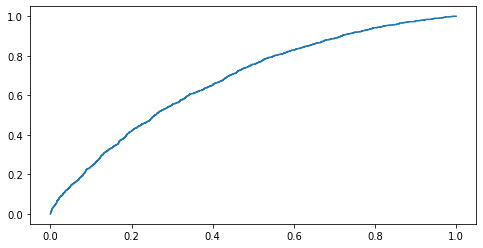

In [67]:
#LightGBMのハイパーパラメータ設定
params = {
    'objective': 'binary', 
    'metric': 'auc',
    'num_leaves': 23,
    'learning_rate': 0.05, 
    'feature_fraction': 0.4, 
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': -1,
    'lambda_l1': 0.81,
    'lambda_l2': 90
}
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    train_set = lgb.Dataset(X_tr, y_tr)
    val_set = lgb.Dataset(X_val, y_val)
    
    model = lgb.train(params, train_set, num_boost_round = 500, early_stopping_rounds = 100, valid_sets = [train_set, val_set], verbose_eval = 100)
    
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    pred = model.predict(Test_x)
    preds.append(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:4f}')
    auc_sum.append(auc)

#特徴量の重要度を出力する
importances = model.feature_importance()
column_names = Train_x.columns.values
temp = []
for i in range(len(column_names)):
    temp.append([importances[i],column_names[i]])
temp.sort(reverse=True, key=lambda x:x[0])
for i in range(len(temp)):
    print(temp[i][0]," : ",temp[i][1])
    
print(np.mean(auc_sum))

last_pred_1 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_1[i] += preds[j][i]
    last_pred_1[i] /= splits


curve = roc_curve(test_y, last_pred_1)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_1)
print(auc_test)
ensemble_preds = []
ensemble_preds.append(last_pred_1)

## ②LogisticRegression(アンサンブルで0倍が最適のため不採用)

Fold 1: AUC = 0.6243
Fold 2: AUC = 0.6481
Fold 3: AUC = 0.6368
Fold 4: AUC = 0.6198
Fold 5: AUC = 0.6139
Fold 6: AUC = 0.6545
Fold 7: AUC = 0.6312
0.6326706168189113
0.6492732671847292


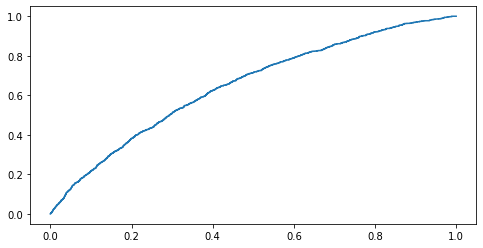

In [68]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    model = LogisticRegression(penalty = 'none',
                               dual = False,
                               tol = 0.001,
                               C = 1.0,
                               fit_intercept = True,
                               intercept_scaling = 1,
                               class_weight = None,
                               random_state = None,
                               solver = 'saga',
                               max_iter = 100,
                               multi_class = 'auto',
                               verbose = 0,
                               warm_start = False,
                               n_jobs = None,
                               l1_ratio = None
                              )
    #訓練データをモデルに適合させる
    model.fit(X_tr, y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = model.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = model.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_2 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_2[i] += preds[j][i]
    last_pred_2[i] /= splits


curve = roc_curve(test_y, last_pred_2)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_2)
print(auc_test)

## ③SGDClassifier(アンサンブルで0倍が最適のため不採用)

Fold 1: AUC = 0.6463
Fold 2: AUC = 0.6347
Fold 3: AUC = 0.6362
Fold 4: AUC = 0.6343
Fold 5: AUC = 0.6671
Fold 6: AUC = 0.5999
Fold 7: AUC = 0.6458
0.6377362432653177
0.6539000567174298


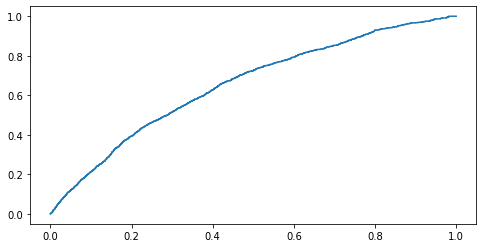

In [69]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits=splits,shuffle=True,random_state=71)

for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val,y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    #ロジスティック回帰のインスタンスを生成
    lr = SGDClassifier(penalty='elasticnet',
                       alpha = 0.003,
                       l1_ratio = 0.3,
                       tol=0.0001,
                       fit_intercept=True,
                       class_weight='balanced',
                       random_state=None,
                       max_iter=1000,
                       verbose=0,
                       warm_start=False,
                       n_jobs=None,
                       loss ='log_loss'
                       )
    #訓練データをモデルに適合させる
    lr.fit(X_tr,y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = lr.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = lr.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_3 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_3[i] += preds[j][i]
    last_pred_3[i] /= splits


curve = roc_curve(test_y, last_pred_3)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_3)
print(auc_test)

## ④SVM(処理に時間がかかりすぎたため不採用)

In [70]:
'''
from sklearn.pipeline import Pipeline

auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = svm.SVC(kernel = 'linear', probability = True)
    
    #訓練データをモデルに適合させる
    clf.fit(X_tr,y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = clf.predict(X_val, prediction_type='Probability')
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict(Test_x, prediction_type='Probability')
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_4 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_4[i] += preds[j][i]
    last_pred_4[i] /= splits


curve = roc_curve(test_y, last_pred_4)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_4)
print(auc_test)
'''

pass

## ⑤決定木(他に比べて明らかにスコアが低いので不採用)

Fold 1: AUC = 0.5371
Fold 2: AUC = 0.5297
Fold 3: AUC = 0.5471
Fold 4: AUC = 0.5170
Fold 5: AUC = 0.5390
Fold 6: AUC = 0.5244
Fold 7: AUC = 0.5091
0.5290503259333018
0.6187751398378012


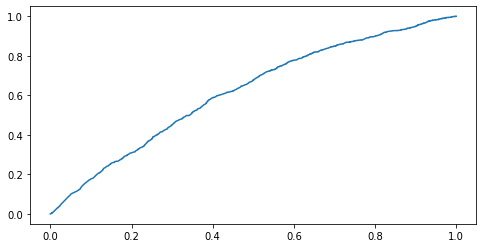

In [71]:
from sklearn import tree

auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                      splitter = 'best',
                                      max_depth = 4, 
                                      min_samples_split = 3,
                                      min_samples_leaf = 1,
                                      min_weight_fraction_leaf = 0.0,
                                      max_features = 4,
                                      random_state = None,
                                      max_leaf_nodes = 8,
                                      min_impurity_decrease = 1e-07,
                                      class_weight = 'balanced'
                                     )
    #訓練データをモデルに適合させる
    clf.fit(X_tr,y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_5 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_5[i] += preds[j][i]
    last_pred_5[i] /= splits


curve = roc_curve(test_y, last_pred_5)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_5)
print(auc_test)

## ⑥ランダムフォレスト

Fold 1: AUC = 0.6245
Fold 2: AUC = 0.6420
Fold 3: AUC = 0.6333
Fold 4: AUC = 0.6054
Fold 5: AUC = 0.6260
Fold 6: AUC = 0.6245
Fold 7: AUC = 0.6094
0.6235937448289313
0.6525735126342964


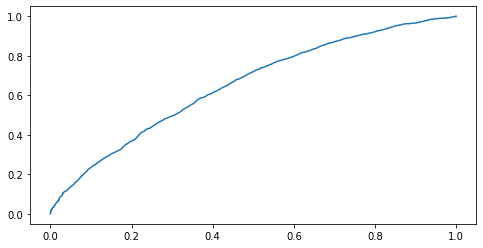

In [72]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = RandomForestClassifier(random_state = 53)
    #訓練データをモデルに適合させる
    clf.fit(X_tr,y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_6 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_6[i] += preds[j][i]
    last_pred_6[i] /= splits


curve = roc_curve(test_y, last_pred_6)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_6)
print(auc_test)
ensemble_preds.append(last_pred_6)

# ⑦アダブースト

Fold 1: AUC = 0.6318
Fold 2: AUC = 0.6305
Fold 3: AUC = 0.6277
Fold 4: AUC = 0.6182
Fold 5: AUC = 0.6283
Fold 6: AUC = 0.6323
Fold 7: AUC = 0.6433
0.6302922304418443
0.649605178236153


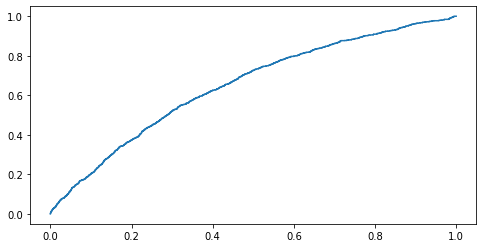

In [73]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = AdaBoostClassifier(random_state = 53)
    #訓練データをモデルに適合させる
    clf.fit(X_tr,y_tr)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_7 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_7[i] += preds[j][i]
    last_pred_7[i] /= splits


curve = roc_curve(test_y, last_pred_7)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_7)
print(auc_test)
ensemble_preds.append(last_pred_7)

## ⑧catboost

0:	learn: 0.5814157	test: 0.5805625	best: 0.5805625 (0)	total: 5.9ms	remaining: 1.17s
1:	learn: 0.5045485	test: 0.5026669	best: 0.5026669 (1)	total: 13.6ms	remaining: 1.35s
2:	learn: 0.4547336	test: 0.4522333	best: 0.4522333 (2)	total: 20.6ms	remaining: 1.35s
3:	learn: 0.4205583	test: 0.4179391	best: 0.4179391 (3)	total: 28.1ms	remaining: 1.38s
4:	learn: 0.3988720	test: 0.3962179	best: 0.3962179 (4)	total: 36.3ms	remaining: 1.41s
5:	learn: 0.3830285	test: 0.3804836	best: 0.3804836 (5)	total: 43.3ms	remaining: 1.4s
6:	learn: 0.3728174	test: 0.3705045	best: 0.3705045 (6)	total: 50.6ms	remaining: 1.39s
7:	learn: 0.3650516	test: 0.3629086	best: 0.3629086 (7)	total: 56.4ms	remaining: 1.35s
8:	learn: 0.3589935	test: 0.3577303	best: 0.3577303 (8)	total: 62.6ms	remaining: 1.33s
9:	learn: 0.3543860	test: 0.3538983	best: 0.3538983 (9)	total: 68.2ms	remaining: 1.29s
10:	learn: 0.3522163	test: 0.3517085	best: 0.3517085 (10)	total: 73.6ms	remaining: 1.26s
11:	learn: 0.3498293	test: 0.3499532	best: 

71:	learn: 0.2962774	test: 0.3526999	best: 0.3519672 (64)	total: 372ms	remaining: 661ms
72:	learn: 0.2955755	test: 0.3525707	best: 0.3519672 (64)	total: 377ms	remaining: 656ms
73:	learn: 0.2945315	test: 0.3526274	best: 0.3519672 (64)	total: 382ms	remaining: 651ms
74:	learn: 0.2939682	test: 0.3526915	best: 0.3519672 (64)	total: 387ms	remaining: 645ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3519672104
bestIteration = 64

Shrink model to first 65 iterations.
Fold 2: AUC = 0.6780
0:	learn: 0.5773625	test: 0.5817213	best: 0.5817213 (0)	total: 5.99ms	remaining: 1.19s
1:	learn: 0.5016816	test: 0.5090685	best: 0.5090685 (1)	total: 11ms	remaining: 1.09s
2:	learn: 0.4519438	test: 0.4619417	best: 0.4619417 (2)	total: 16.4ms	remaining: 1.08s
3:	learn: 0.4166463	test: 0.4299330	best: 0.4299330 (3)	total: 22ms	remaining: 1.08s
4:	learn: 0.3942526	test: 0.4096988	best: 0.4096988 (4)	total: 27.1ms	remaining: 1.06s
5:	learn: 0.3786876	test: 0.3959767	best: 0.3959767 (5)	tota

38:	learn: 0.3233474	test: 0.3144646	best: 0.3144646 (38)	total: 220ms	remaining: 909ms
39:	learn: 0.3225054	test: 0.3143702	best: 0.3143702 (39)	total: 225ms	remaining: 901ms
40:	learn: 0.3217711	test: 0.3142947	best: 0.3142947 (40)	total: 230ms	remaining: 892ms
41:	learn: 0.3212597	test: 0.3139597	best: 0.3139597 (41)	total: 235ms	remaining: 884ms
42:	learn: 0.3206606	test: 0.3139581	best: 0.3139581 (42)	total: 240ms	remaining: 877ms
43:	learn: 0.3199952	test: 0.3137693	best: 0.3137693 (43)	total: 245ms	remaining: 869ms
44:	learn: 0.3196131	test: 0.3137782	best: 0.3137693 (43)	total: 251ms	remaining: 863ms
45:	learn: 0.3187845	test: 0.3138232	best: 0.3137693 (43)	total: 256ms	remaining: 857ms
46:	learn: 0.3180313	test: 0.3138367	best: 0.3137693 (43)	total: 261ms	remaining: 851ms
47:	learn: 0.3175121	test: 0.3138399	best: 0.3137693 (43)	total: 266ms	remaining: 844ms
48:	learn: 0.3166203	test: 0.3141668	best: 0.3137693 (43)	total: 271ms	remaining: 835ms
49:	learn: 0.3158408	test: 0.314

32:	learn: 0.3252038	test: 0.3254605	best: 0.3254605 (32)	total: 182ms	remaining: 923ms
33:	learn: 0.3241719	test: 0.3251360	best: 0.3251360 (33)	total: 187ms	remaining: 914ms
34:	learn: 0.3236516	test: 0.3251749	best: 0.3251360 (33)	total: 192ms	remaining: 904ms
35:	learn: 0.3228259	test: 0.3249124	best: 0.3249124 (35)	total: 197ms	remaining: 897ms
36:	learn: 0.3218548	test: 0.3248576	best: 0.3248576 (36)	total: 202ms	remaining: 892ms
37:	learn: 0.3210902	test: 0.3244764	best: 0.3244764 (37)	total: 208ms	remaining: 886ms
38:	learn: 0.3206648	test: 0.3243346	best: 0.3243346 (38)	total: 213ms	remaining: 880ms
39:	learn: 0.3203104	test: 0.3244342	best: 0.3243346 (38)	total: 218ms	remaining: 872ms
40:	learn: 0.3195487	test: 0.3243993	best: 0.3243346 (38)	total: 223ms	remaining: 864ms
41:	learn: 0.3189199	test: 0.3246234	best: 0.3243346 (38)	total: 228ms	remaining: 858ms
42:	learn: 0.3183055	test: 0.3246475	best: 0.3243346 (38)	total: 233ms	remaining: 851ms
43:	learn: 0.3174047	test: 0.324

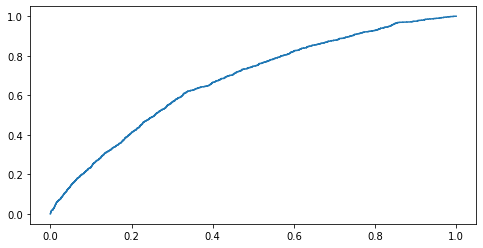

In [77]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 74)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    train_pool = Pool(X_tr, label = y_tr)
    test_pool  = Pool(X_val,label = y_val)
    
    params = {
        'depth' : 6,
        'learning_rate' : 0.16,
        'early_stopping_rounds' : 10,
        'iterations' : 200,
        'custom_loss' : ['Accuracy'],
        'random_seed' : 42,   
    }

    clf = CatBoostClassifier(**params)
    #訓練データをモデルに適合させる
    clf.fit(train_pool, eval_set = test_pool)
    
    #訓練データから予測 & aucの算出
    y_pred_2d = clf.predict(X_val, prediction_type='Probability')
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict(Test_x, prediction_type='Probability')
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_8 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_8[i] += preds[j][i]
    last_pred_8[i] /= splits


curve = roc_curve(test_y, last_pred_8)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_8)
print(auc_test)
ensemble_preds.append(last_pred_8)

# 最終スコアの算出

## アンサンブル

In [75]:
from itertools import product

def find_permutations(n):
    perm_list = []
    current_perm = [0] * n
    
    while True:
        if sum(current_perm) == 10:
            perm_list.append(tuple(current_perm))
    
        i = n-1
        while i >= 0 and current_perm[i] == 10:
            current_perm[i] = 0
            i -= 1
            
        if i < 0:
            break
        
        current_perm[i] += 1
    
    return perm_list

n = 4
permutations = find_permutations(n)
last_pred = len(test_y) * [0.0]
l = []
for i in range(n):
    l.append(0.0)
best_score = 0
for perm in permutations:
    for i in range(len(test_y)):
        last_pred_list = len(test_y) * l
        last_pred_list[i] = [last_pred_1[i], last_pred_6[i], last_pred_7[i], last_pred_8[i]]
        last_pred[i] = np.dot(last_pred_list[i], perm) / 10
    auc_test = roc_auc_score(test_y, last_pred)
    if auc_test > best_score:
        best_score = auc_test
        best_perm = perm
    print(perm, auc_test)
print('best param is ', best_perm, ', best score is ', best_score)

(0, 0, 0, 10) 0.6781346158860958
(0, 0, 1, 9) 0.6781434168665901
(0, 0, 2, 8) 0.6781298894336081
(0, 0, 3, 7) 0.6780767575884009
(0, 0, 4, 6) 0.677932111844164
(0, 0, 5, 5) 0.677687966126004


KeyboardInterrupt: 

In [76]:
def max_score(preds,dif,test_y,over_value_sum = [0.0], depth = [0],max = [0.0], ensemble_pred = [0.0],max_ratio = [0.0], now_ratio = [0.0]):
    
    if len(preds) == depth[0]+1: #最深部での処理
        temp_ensemble_pred = len(preds[0])*[0.0]
        
        for i in range(len(preds[0])):
            temp_ensemble_pred[i] = ensemble_pred[i]
            
        value = 1.0 - over_value_sum[0]
        now_ratio[depth[0]] = value
        
        for i in range(len(preds[0])):
            ensemble_pred[i] += preds[depth[0]][i]*value
        ensemble_auc = roc_auc_score(test_y,ensemble_pred)
        
        for i in range(len(preds[0])):
            ensemble_pred[i] = temp_ensemble_pred[i]
            
        if ensemble_auc > max[0]:
            for i in range(len(now_ratio)):
                max_ratio[i] = now_ratio[i]
            max[0] = ensemble_auc
        
        
    elif depth[0] == 0:              #最浅部での処理
        ensemble_pred = len(preds[0])*[0.0] #最深部でAUCを計算するためのリスト
        max_ratio  = len(preds)*[0.0]       #AUCの最大値を更新した際に、それを与えたアンサンブル割合を格納するリスト
        now_ratio  = len(preds)*[0.0]       #現在のアンサンブル割合を格納するリスト
        while over_value_sum[0]<=1.0+dif:
                
            max_score(preds=preds,dif=dif,test_y=test_y,over_value_sum= over_value_sum,depth = [1], max = max, ensemble_pred = ensemble_pred, max_ratio = max_ratio, now_ratio = now_ratio)
            
            for i in range(len(preds[0])):
                ensemble_pred[i] += preds[depth[0]][i]*dif
                
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif
            
        return [max[0],max_ratio]
    else:  #その他の深さでの処理
        now_ratio[depth[0]] = 0.0
        temp_ratio = now_ratio
        temp_over_value_sum = over_value_sum[0]
        
        temp_ensemble_pred = len(preds[0])*[0.0]
        for i in range(len(preds[0])):
            temp_ensemble_pred[i] = ensemble_pred[i]
            
        while over_value_sum[0]<=1.0:
                
            max_score(preds=preds,dif=dif,test_y=test_y,over_value_sum = over_value_sum, depth = [depth[0]+1],max = max, ensemble_pred = ensemble_pred, max_ratio = max_ratio, now_ratio = now_ratio)
            
            for i in range(len(preds[0])):
                ensemble_pred[i] += preds[depth[0]][i]*dif
                
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif
        now_ratio = temp_ratio
        over_value_sum[0] = temp_over_value_sum
        
        for i in range(len(preds[0])):
            ensemble_pred[i] = temp_ensemble_pred[i]
            
        now_ratio[depth[0]] = 0.0
        
#アンサンブル処理
dif = 0.05
result = max_score(preds = ensemble_preds, dif = dif, test_y = test_y)
print(result)

[0.6807228375664963, [0.39999999999999997, 0.1, 0.05, 0.45000000000000007]]
